In [12]:
from pandas_datareader import data, wb
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline

Here we load Data

In [13]:
BAC = data.DataReader("BAC", 'yahoo', start = '2006-01-01', end = '2016-01-01')
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806


In [14]:
C = data.DataReader("C", 'yahoo', start = '2006-01-01', end = '2016-01-01')
GS = data.DataReader("GS", 'yahoo', start = '2006-01-01', end = '2016-01-01')
JPM = data.DataReader("JPM", 'yahoo', start = '2006-01-01', end = '2016-01-01')
MS = data.DataReader("MS", 'yahoo', start = '2006-01-01', end = '2016-01-01')
WFC = data.DataReader("WFC", 'yahoo', start = '2006-01-01', end = '2016-01-01')


Then I Create a list of the ticker symbols in alphabetical order

In [15]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

concatenate the bank dataframes together to a single data frame

In [20]:
bank_stocks = pd.concat([BAC,C, GS, JPM,MS,WFC],axis =1,keys = tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.297882  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.336124  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.731342  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

max Close price for each bank's stock throughout the time period

In [22]:
bank_stocks.xs(tickers, axis =1).xs('Close', level ='Stock Info', axis =1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

creating a new empty DataFrame called returns which contain the returns for each bank's stock

In [23]:
returns1 = pd.DataFrame()
for x in tickers:
    returns1[x +' Return'] = bank_stocks[x]['Close'].pct_change()
returns1.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


VISUALISATION

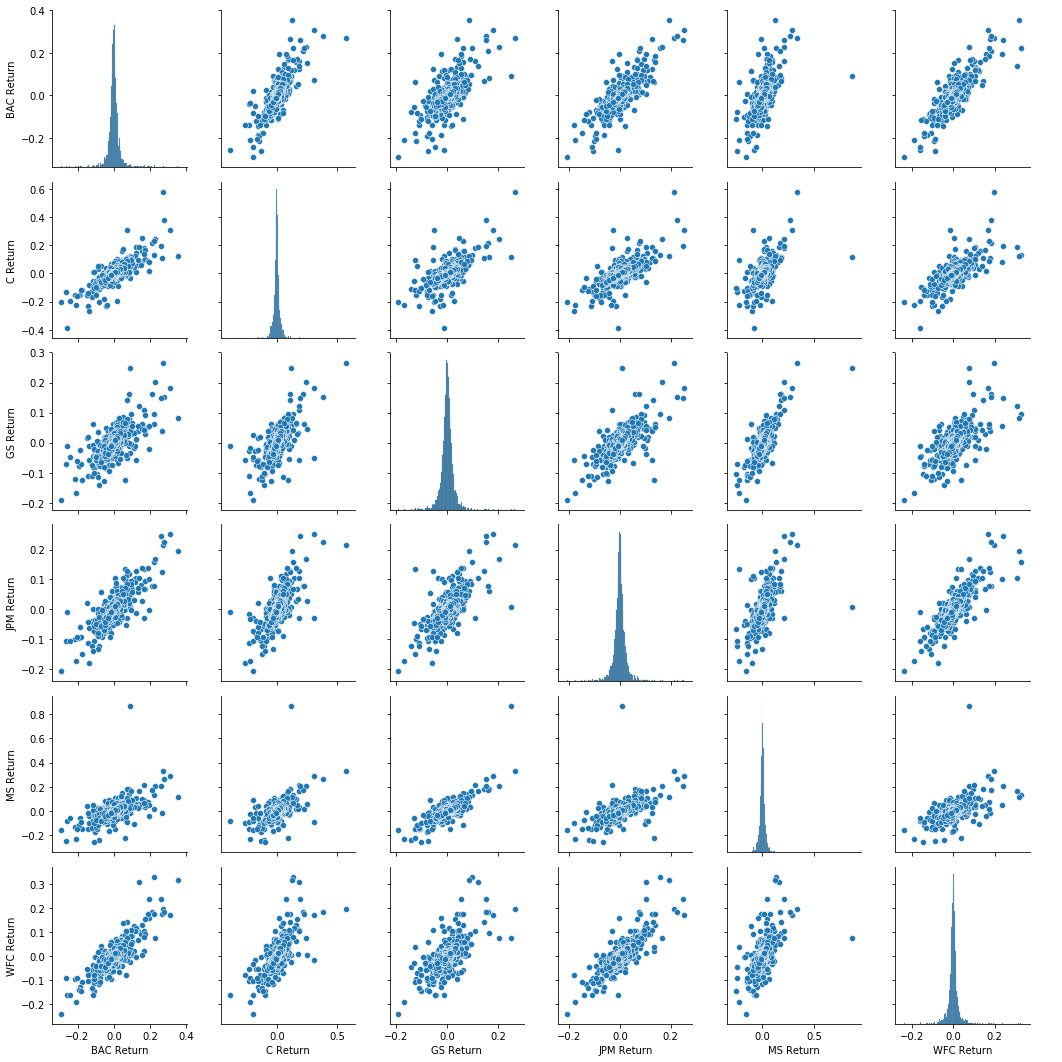

In [24]:
sns.pairplot(returns1[1:])

In [26]:
# Worst Drop (4 of them on Inauguration day)
returns1.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [27]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns1.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

It is seen that Citigroup had a stock split

In [29]:
returns1.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [33]:
returns1.reset_index(inplace = True)
returns1[returns1['Date'].apply(lambda x : x.year == 2015)].std()# Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/Users/mary/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


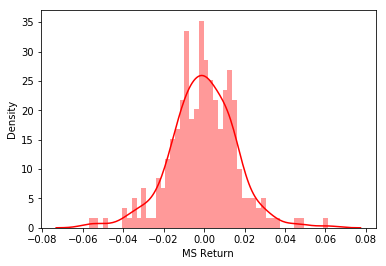

In [35]:
sns.distplot(returns1[returns1['Date'].apply(lambda x : x.year == 2015)]['MS Return'],color = 'red', bins = 50)

/Users/mary/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


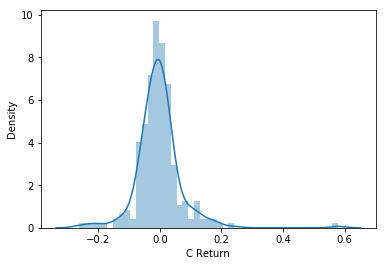

In [36]:
sns.distplot(returns1[returns1['Date'].apply(lambda x: x.year == 2008)]['C Return'])

Some imports for more visualizations

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

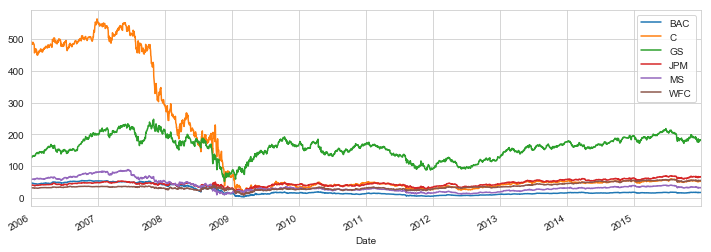

In [38]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

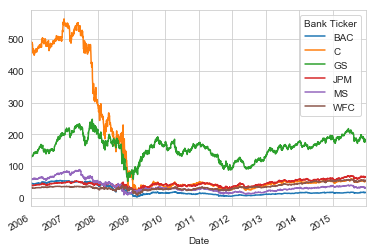

In [39]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

Calculating Moving average

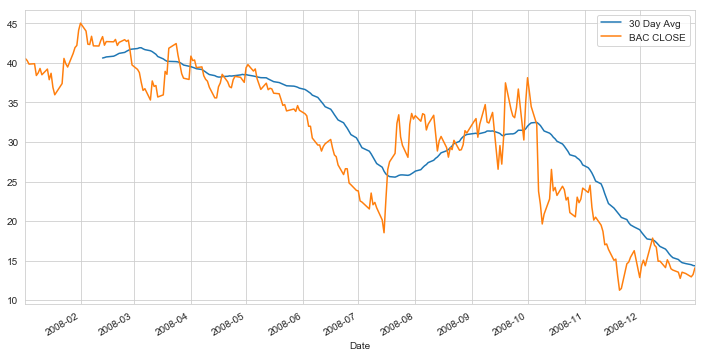

In [41]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

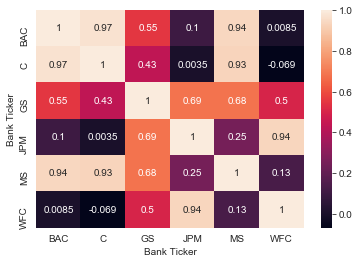

In [42]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

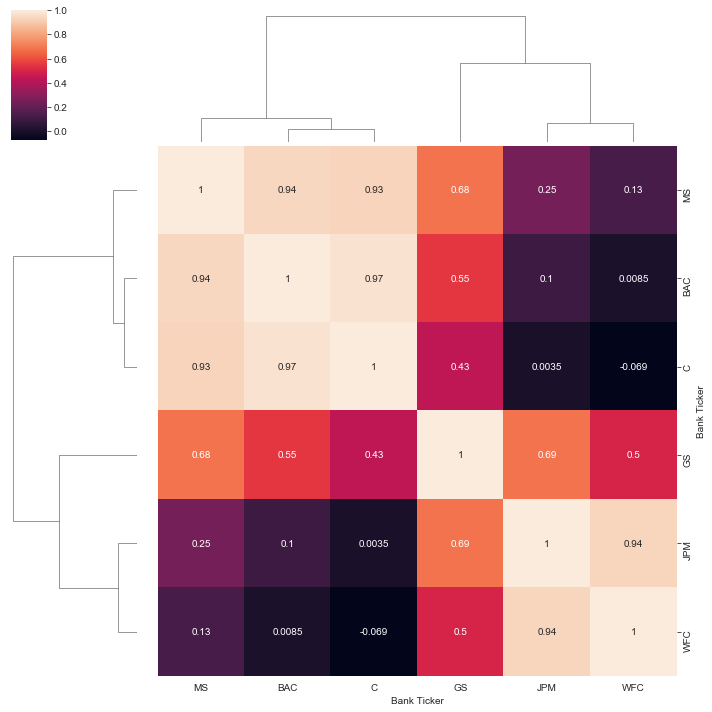

In [43]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Created a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [45]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

Used .ta_plot to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [46]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Created a Bollinger Band Plot for Bank of America for the year 2015

In [47]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')